In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
print(os.listdir("input"))

['train.csv', 'test.csv', 'gender_submission.csv']


In [5]:
df = pd.read_csv('input/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


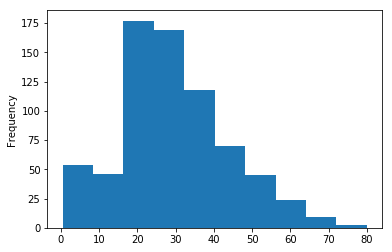

In [10]:
df['Age'].plot(kind='hist')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Embarked')

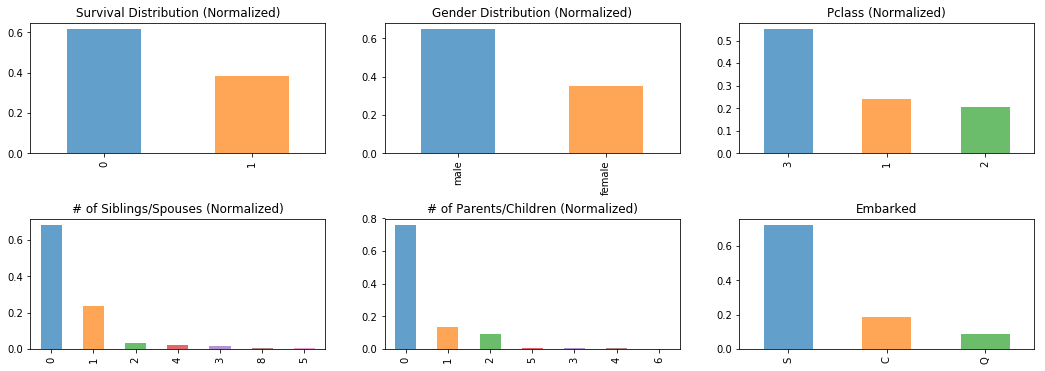

In [12]:
# Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((2,3), (0,0))
df['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Survival Distribution (Normalized)')

plt.subplot2grid((2,3), (0,1))
df['Sex'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Gender Distribution (Normalized)')

plt.subplot2grid((2,3), (0,2))
df['Pclass'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Pclass (Normalized)')

plt.subplot2grid((2,3), (1,0))
df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Siblings/Spouses (Normalized)')

plt.subplot2grid((2,3), (1,1))
df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Parents/Children (Normalized)')

plt.subplot2grid((2,3), (1,2))
df['Embarked'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Embarked')

Text(0.5, 1.0, 'Poor Men Survival')

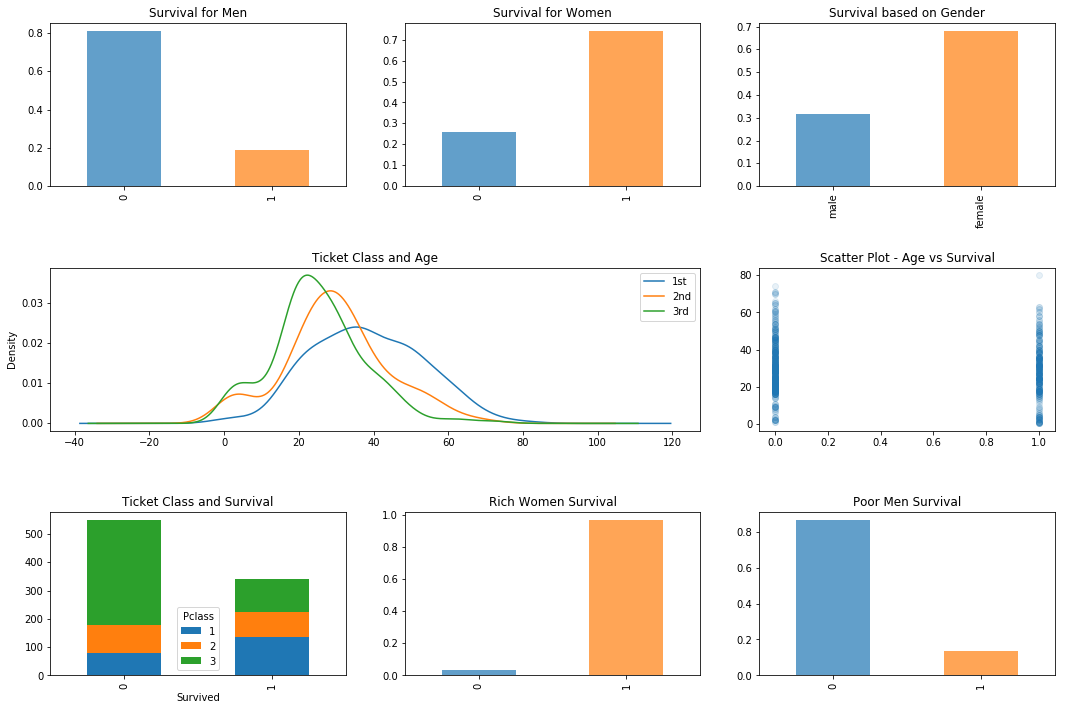

In [13]:
fig = plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace=0.5)

plt.subplot2grid((3,3), (0,0))
male = df[df['Sex']=='male']
male['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Survival for Men')

plt.subplot2grid((3,3), (0,1))
female = df[df['Sex']=='female']
female['Survived'].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7)
plt.title('Survival for Women')

plt.subplot2grid((3,3), (0,2))
df['Sex'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7)
plt.title('Survival based on Gender')

plt.subplot2grid((3,3), (1,0), colspan=2)
for ticketclass in sorted(df['Pclass'].unique()):
    df['Age'][df['Pclass']==ticketclass].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.title('Ticket Class and Age')

plt.subplot2grid((3,3), (1,2))
plt.scatter(df['Survived'], df['Age'], alpha=0.1)
plt.title('Scatter Plot - Age vs Survival')

ax = plt.subplot2grid((3,3), (2,0))
df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Ticket Class and Survival')

plt.subplot2grid((3,3), (2,1))
df['Survived'][(df['Sex']=='female') & (df['Pclass']==1)].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7)
plt.title('Rich Women Survival')

plt.subplot2grid((3,3), (2,2))
df['Survived'][(df['Sex']=='male') & (df['Pclass']==3)].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Poor Men Survival')

In [14]:
# Clean the data and fill missing values
def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] = data['Age'].fillna(data['Age'].dropna().median())
    
    # Encode categorical variables
    data.loc[data['Sex'] == 'male', 'Sex']=0
    data.loc[data['Sex'] == 'female', 'Sex']=1
    
    # Most common embarkment point
    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data['Embarked']=='S','Embarked'] = 0
    data.loc[data['Embarked']=='C','Embarked'] = 1    
    data.loc[data['Embarked']=='Q','Embarked'] = 2